In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [2]:
wineData = pd.read_csv("wineQualityN.csv")

In [3]:
wineData.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Predicting the quality of the wine from the given data

##### pre-processing data

In [19]:
wineData.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [20]:
wineData.dropna(inplace = True)

In [21]:
wineData["type"].unique()

array(['white', 'red'], dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


In [33]:
wineData.loc[wineData["quality"] <= 5, "quality" ] = 0
wineData.loc[wineData["quality"] >= 6, "quality" ] = 1

In [34]:
X = wineData.drop("quality", axis = 1).values
y = wineData["quality"].values

In [35]:
le = LabelEncoder()

In [36]:
X[:, 0] = le.fit_transform(X[:, 0])

In [37]:
print(X)

[[1 7.0 0.27 ... 3.0 0.45 8.8]
 [1 6.3 0.3 ... 3.3 0.49 9.5]
 [1 8.1 0.28 ... 3.26 0.44 10.1]
 ...
 [0 6.3 0.51 ... 3.42 0.75 11.0]
 [0 5.9 0.645 ... 3.57 0.71 10.2]
 [0 6.0 0.31 ... 3.39 0.66 11.0]]


##### per our standard we are going to give a 0 for quality <= 6 and 1 for a quality >= 7; 0 for bad wine, 1 for good wine 

In [38]:
sc = StandardScaler()

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

###### lets create our ann

In [41]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
model_1 = tf.keras.models.Sequential()

In [48]:
model_1.add(tf.keras.layers.Dense(units= 6, activation = "relu"))

In [49]:
model_1.add(tf.keras.layers.Dense(units= 6, activation = "relu"))

In [50]:
model_1.add(tf.keras.layers.Dense(units= 1, activation = "sigmoid"))

###### now let us compile our layers all the connected layers

In [51]:
model_1.compile(optimizer="adam", loss= "binary_crossentropy", metrics = ["accuracy"])

##### fitting our model

In [52]:
history = model_1.fit(X_train, y_train, batch_size=32, epochs = 100)

Epoch 1/100
136/136 [==============================] - 7s 3ms/step - loss: 0.5862 - accuracy: 0.7963
Epoch 2/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2764 - accuracy: 0.9977
Epoch 3/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 1.0000
Epoch 4/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 1.0000
Epoch 5/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 6/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 7/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 8/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 9/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 10/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0021 - accura

136/136 [==============================] - 0s 2ms/step - loss: 1.8504e-06 - accuracy: 1.0000
Epoch 79/100
136/136 [==============================] - 0s 2ms/step - loss: 1.7128e-06 - accuracy: 1.0000
Epoch 80/100
136/136 [==============================] - 0s 2ms/step - loss: 1.5839e-06 - accuracy: 1.0000
Epoch 81/100
136/136 [==============================] - 0s 2ms/step - loss: 1.4658e-06 - accuracy: 1.0000
Epoch 82/100
136/136 [==============================] - 0s 2ms/step - loss: 1.3563e-06 - accuracy: 1.0000
Epoch 83/100
136/136 [==============================] - 0s 2ms/step - loss: 1.2534e-06 - accuracy: 1.0000
Epoch 84/100
136/136 [==============================] - 0s 2ms/step - loss: 1.1599e-06 - accuracy: 1.0000
Epoch 85/100
136/136 [==============================] - 0s 2ms/step - loss: 1.0738e-06 - accuracy: 1.0000
Epoch 86/100
136/136 [==============================] - 0s 2ms/step - loss: 9.9384e-07 - accuracy: 1.0000
Epoch 87/100
136/136 [==============================] - 0s 

In [53]:
model_1.evaluate(X_train, y_train)

136/136 [==============================] - 0s 1ms/step - loss: 3.2472e-07 - accuracy: 1.0000


[3.2471575650561135e-07, 1.0]

Text(0.5, 1.0, 'Model 1 loss curve')

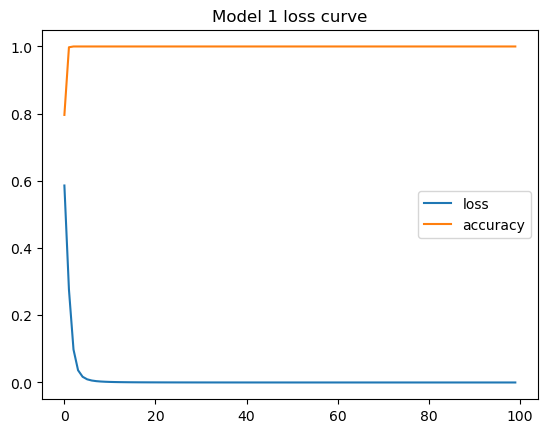

In [56]:
pd.DataFrame(history.history).plot()
plt.title("Model 1 loss curve")

In [57]:
y_pred = model_1.predict(X_test)

67/67 [==============================] - 0s 912us/step


In [58]:
y_pred = (y_pred > 0.5)

In [59]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [61]:
cm = confusion_matrix(y_test, y_pred)

In [62]:
print(cm)

[[2133]]


In [63]:
ac = accuracy_score(y_test, y_pred)

In [64]:
ac

1.0

In [81]:
print(model_1.predict(sc.transform([[0, 6.3, 0.48, 0.04, 1.1, 0.046, 30, 99, 0.9928, 3.24, 0.36, 9.6]])) > 0.5)

1/1 [==============================] - 0s 28ms/step
[[False]]


In [68]:
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Dense(units= 4, activation = "relu"))
model_2.add(tf.keras.layers.Dense(units= 1, activation = "sigmoid"))

In [69]:
model_2.compile(optimizer="adam", loss= "binary_crossentropy", metrics = ["accuracy"])

In [70]:
history2 = model_2.fit(X_train, y_train, epochs = 50)

Epoch 1/50
136/136 [==============================] - 1s 1ms/step - loss: 0.4252 - accuracy: 0.8575
Epoch 2/50
136/136 [==============================] - 0s 1ms/step - loss: 0.2266 - accuracy: 0.9852
Epoch 3/50
136/136 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.9995
Epoch 4/50
136/136 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9998
Epoch 5/50
136/136 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 1.0000
Epoch 6/50
136/136 [==============================] - 0s 1ms/step - loss: 0.0328 - accuracy: 1.0000
Epoch 7/50
136/136 [==============================] - 0s 1ms/step - loss: 0.0231 - accuracy: 1.0000
Epoch 8/50
136/136 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 9/50
136/136 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 10/50
136/136 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 1.0000